# From neuron to neural net

Last time, we looked at a single neuron. We discussed the parallels between that neuron with two weights and linear regression. As we add more features (columns in our X matrix) we can add more neurons.

## Activation Functions

But, as we add neurons, each neuron is still mostly functioning like linear regression. The next thing we can add to our neuron is an **activation function**. Activation functions adjust the output of a neuron by adding some function before the final output. Below are the "linear" activation function that we have modeled so far, plus the more common **ReLU (Rectified Linear Unit)** and **Sigmoid** activation functions.

![Diagrams of the linear, ReLU and Sigmoid activation functions](images/Activation_function_diagrams.png)


Again, the activation function is applied to the output of a neuron and is a hyperparameter of the model. In practice, while layers may use different activation functions, the same function is applied to **all neurons** of each layer. Below is a single neuron, with the a couple possible activation functions.

![Diagram of a neuron with activation function](images/Activation_function.png)

## Layers

As we get multiple neurons, we need some way of coordinating their output, so we can add a layer to gather the output from multiple neurons into the needed number of outputs (more on that later). But the other thing that layers do is allow deeper networks with multiple layers, each selected for functional or empirical reasons. This is where deep learning gets its name--as networks grow to have more and more layers of neurons, we refer to them as deep networks--there is no agreed upon cutoff here...more than three???

![A two layer neural network](images/Neural_network.png)

In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('data/diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Get our X and y
X = df.drop(columns='Outcome')
y = df['Outcome']

In [4]:
# Scale data - mean 0 std dev 1

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [5]:
model = keras.Sequential([
    layers.Dense(8, input_dim=8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    ])

model.summary()

2022-02-28 08:40:52.078090: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


2022-02-28 08:40:52.568818: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79125 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:07:00.0, compute capability: 8.0


In [6]:
# Set some model hyperparameters
from tensorflow.keras.optimizers import Adam

lr = 0.001  # Set the learning rate. Start with default for Adam, 0.001
optimizer = Adam(learning_rate=lr)  # Set the optimizer. Start with adam.

# Compile the model--a necessary step with Keras models
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [8]:
# Now we can fit the model
# Let's also save the training history for plotting

history = model.fit(X, y, epochs=150, validation_split=0.25, batch_size=10, verbose=1)


Epoch 1/150
58/58 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.7778 - val_loss: 0.4403 - val_accuracy: 0.7865
Epoch 2/150
58/58 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.7812 - val_loss: 0.4403 - val_accuracy: 0.7865
Epoch 3/150
58/58 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.7778 - val_loss: 0.4390 - val_accuracy: 0.7917
Epoch 4/150
58/58 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.7795 - val_loss: 0.4388 - val_accuracy: 0.7865
Epoch 5/150
58/58 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.7830 - val_loss: 0.4386 - val_accuracy: 0.7865
Epoch 6/150
58/58 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.7830 - val_loss: 0.4387 - val_accuracy: 0.7812
Epoch 7/150
58/58 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.7830 - val_loss: 0.4395 - val_accuracy: 0.7760
Epoch 8/150
5

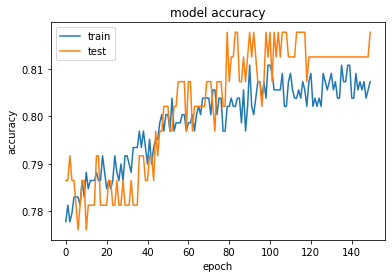

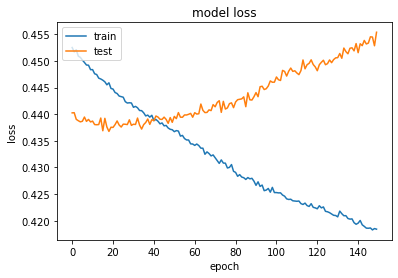

In [9]:
# Make some nice plots

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Experimentation

Using what you know so far, try to make the best possible model to predict diabetes with these data.

Things to try:

* Try normalizing data (all values between 0 and 1)
    ```python
    # Normalize data - all between 0 and 1
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    ```
* Adding layers
* Adjusting the number of neurons per layer (you do need to get back to 1 with a sigmoid activation at the end)
* Different activation functions
* Adjusting the number of epochs
* Adjusting learning rate
